# Notebook initialization:


In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [3.0,2.0]




import os 
path_to_class_sz = os.getcwd() + '/../../'

Metal device set to: Apple M1 Pro


2023-03-24 13:44:32.522860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-24 13:44:32.522974: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Settings

In [3]:

# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1,
    
    'use_redshift_dependent_M_min': 1,
    'full_path_to_redshift_dependent_M_min':path_to_class_sz+'class_sz_auxiliary_files/websky_halo_mass_completion_z_Mmin_in_Msun_over_h.txt',
    #'M_min' : 1e10*websky_cosmo['h'], # not used
    'M_max' : 1e16*websky_h,
    'z_min' : 5e-3,
    'z_max' : 4.6,
}


# Compute

In [4]:
%%time 
M = Class()


M.set(common_settings)
M.set(websky_cosmo)



M.set({# class_sz parameters:
       'output':'tSZ_1h,tSZ_2h,te_y_y',
       'mass function' : 'M500', 
       'pressure profile': 'P13',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
       'ell_max' : 25000,
       'ell_min' : 2,
       'dlogell': 0.1,
       'z_min': 0.0001,
       'z_max': 4.,
       'M_min':1e10, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.41,
       'hm_consistency':0,

       'redshift_epsrel': 1e-4,
       'redshift_epsabs': 1e-100,
       'mass_epsrel':1e-4,
       'mass_epsabs':1e-100,
        })


M.compute()

CPU times: user 16.6 s, sys: 41.8 ms, total: 16.6 s
Wall time: 2.24 s


In [5]:
cl_sz = M.cl_sz()
cl_te_y_y = M.cl_te_y_y()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


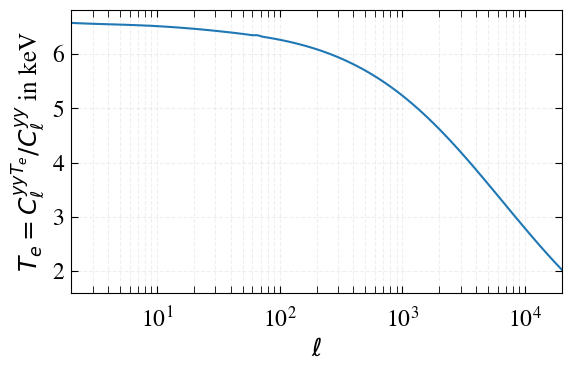

In [6]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(6,4))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(cl_sz['ell'],np.asarray(cl_te_y_y['teyy'])/np.asarray(cl_sz['1h']))

ax.set_xscale('log')
# ax.set_yscale('log')


ax.set_xlabel('$\ell$',fontsize=18)
ax.set_ylabel(r'$T_e = C_\ell^{yyT_e}/C_\ell^{yy}$ in keV',fontsize=18)
ax.legend(loc=1,ncol = 1,frameon=False,fontsize=14)

ax.set_xlim(2,2e4)
# ax.set_ylim(1e-28,1e-17)

fig.tight_layout()
fig.tight_layout()
plt.savefig('../../notebooks/class_sz_tutorial_notebooks/figures/class_sz_electron_temperature_cls.pdf')